In [65]:
import os
current_dir = os.getcwd()
current_dir

'/Users/apple/Documents/MLSys_100Knocks/本章/1章/output_data'

In [66]:
os.chdir('/Users/apple/Documents/MLSys_100Knocks/本章/1章/output_data')
# os.chdir（'移動したいカレントのパス'）と記載するとそこに移動できる

In [67]:
current_dir = os.getcwd()
current_dir
#移動できたことが確認できた

'/Users/apple/Documents/MLSys_100Knocks/本章/1章/output_data'

In [105]:
import pandas as pd

In [106]:
order_data = pd.read_csv('order_data.csv')

In [107]:
print(len(order_data))
order_data.head()

703880


,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,takeout_name,status_name,wide_area_x,narrow_area_x,wide_area_y,narrow_area_y,wide_area,narrow_area
0,16514392,64,C44271355,49,56527968,2020-06-01 11:00:00,2020-06-01 11:55:00,0,2732,2,西東京店,TK,デリバリー,お渡し済み,東京,東京,東京,東京,東京,東京
1,28342394,12,C98307866,98,46924304,2020-06-01 11:00:00,2020-06-01 11:52:00,0,2064,2,西葛西店,TK,デリバリー,お渡し済み,東京,東京,東京,東京,東京,東京
2,29799587,174,C59484037,45,47054474,2020-06-01 11:00:00,2020-06-01 11:25:00,0,3900,2,新座店,SA,デリバリー,お渡し済み,埼玉,埼玉,埼玉,埼玉,埼玉,埼玉
3,96960753,23,C57278332,70,60848267,2020-06-01 11:00:00,2020-06-01 11:45:00,0,2750,2,江東店,TK,デリバリー,お渡し済み,東京,東京,東京,東京,東京,東京
4,52147209,7,C36890849,80,20633593,2020-06-01 11:00:00,2020-06-01 11:23:00,0,2328,2,東尾久店,TK,デリバリー,お渡し済み,東京,東京,東京,東京,東京,東京


In [71]:
order_data = order_data.loc[(order_data['status'] ==1)|(order_data['status']==2)]
#statusが１と２のみ抽出。locで複数条件を指定する場合は、一つの条件を（）でくくり |（orの意味） か&（andの意味）で記号を繋ぐ
print(len(order_data))
order_data.columns

574436


Index(['order_id', 'store_id', 'customer_id', 'coupon_cd', 'sales_detail_id',
       'order_accept_date', 'delivered_date', 'takeout_flag', 'total_amount',
       'status', 'store_name', 'area_cd', 'takeout_name', 'status_name',
       'wide_area_x', 'narrow_area_x', 'wide_area_y', 'narrow_area_y',
       'wide_area', 'narrow_area'],
      dtype='object')

In [72]:
#続いて不要なデータを削除する
analyze_data = order_data[['store_id', 'customer_id', 'coupon_cd', 
       'order_accept_date', 'delivered_date', 'total_amount',
       'store_name', 'wide_area', 'narrow_area',
       'takeout_name', 'status_name']]
print(analyze_data.shape)
analyze_data.head()

(574436, 11)


,store_id,customer_id,coupon_cd,order_accept_date,delivered_date,total_amount,store_name,wide_area,narrow_area,takeout_name,status_name
0,64,C44271355,49,2020-06-01 11:00:00,2020-06-01 11:55:00,2732,西東京店,東京,東京,デリバリー,お渡し済み
1,12,C98307866,98,2020-06-01 11:00:00,2020-06-01 11:52:00,2064,西葛西店,東京,東京,デリバリー,お渡し済み
2,174,C59484037,45,2020-06-01 11:00:00,2020-06-01 11:25:00,3900,新座店,埼玉,埼玉,デリバリー,お渡し済み
3,23,C57278332,70,2020-06-01 11:00:00,2020-06-01 11:45:00,2750,江東店,東京,東京,デリバリー,お渡し済み
4,7,C36890849,80,2020-06-01 11:00:00,2020-06-01 11:23:00,2328,東尾久店,東京,東京,デリバリー,お渡し済み


In [73]:
analyze_data.describe()
#describeは、数値型の項目を対象に集計を行うので「store_idとcoupon_cd」も集計されてしまっている。
#次にデータの形を確認して、適切な型（テキストに変更）に変更して「total_amount」のみ数値にして集計し直す

,store_id,coupon_cd,total_amount
count,574436.000000,574436.000000,574436.000000
mean,99.113844,49.478758,2960.087555
std,55.913615,28.888993,954.282731
min,1.000000,0.000000,698.000000
25%,51.000000,24.000000,2308.000000
50%,99.000000,49.000000,2808.000000
75%,147.000000,75.000000,3617.000000
max,196.000000,99.000000,5100.000000


In [74]:
analyze_data.dtypes

store_id              int64
customer_id          object
coupon_cd             int64
order_accept_date    object
delivered_date       object
total_amount          int64
store_name           object
wide_area            object
narrow_area          object
takeout_name         object
status_name          object
dtype: object

In [75]:
#それぞれがint64(符号あり64ビット整数型)になっいるので文字列(astype(str))に変更
analyze_data[['store_id', 'coupon_cd']] = analyze_data[['store_id', 'coupon_cd']].astype(str)
analyze_data.dtypes

store_id             object
customer_id          object
coupon_cd            object
order_accept_date    object
delivered_date       object
total_amount          int64
store_name           object
wide_area            object
narrow_area          object
takeout_name         object
status_name          object
dtype: object

In [76]:
import warnings
warnings.filterwarnings('ignore')

In [77]:
analyze_data.describe()
#数値の型を持っている「total_amount」のみ集計された

,total_amount
count,574436.000000
mean,2960.087555
std,954.282731
min,698.000000
25%,2308.000000
50%,2808.000000
75%,3617.000000
max,5100.000000


In [78]:
analyze_data['order_accept_date'] = pd.to_datetime(analyze_data['order_accept_date'])
# pandasのto_datatimeを利用してorder_accept_dateのオブジェクトの型を日時のオブジェクトの型に変換
analyze_data['order_accept_month'] = analyze_data['order_accept_date'].dt.strftime('%Y%m')
#order_accept_dateをもとにorder_accept_monthを追加（該当する月を表示する列を追加）
#dt.strftimeは、列を任意のフォーマットの文字列に一括変換する関数。'%Y%m'で年月のフォーマットを指定している
analyze_data[['order_accept_date', 'order_accept_month']].head()

,order_accept_date,order_accept_month
0,2020-06-01 11:00:00,202006
1,2020-06-01 11:00:00,202006
2,2020-06-01 11:00:00,202006
3,2020-06-01 11:00:00,202006
4,2020-06-01 11:00:00,202006


In [79]:
#この章で使用する日付は、order_accept_dateのみだが、delivered_dateも同様にオブジェクトの型を日時のオブジェクトの型に変換しておく。
#複数の日時項目が存在する場合、各項目の差分を計算して所要日数や所要時間を取得するケースもある。
#使う時に混乱することがあるので型は揃えておくのが良い

In [80]:
analyze_data['delivered_date'] = pd.to_datetime(analyze_data['delivered_date'])
analyze_data['delivered_month'] = analyze_data['delivered_date'].dt.strftime('%Y%m')
analyze_data[['delivered_date', 'delivered_month']].head()

,delivered_date,delivered_month
0,2020-06-01 11:55:00,202006
1,2020-06-01 11:52:00,202006
2,2020-06-01 11:25:00,202006
3,2020-06-01 11:45:00,202006
4,2020-06-01 11:23:00,202006


In [81]:
analyze_data.dtypes

store_id                      object
customer_id                   object
coupon_cd                     object
order_accept_date     datetime64[ns]
delivered_date        datetime64[ns]
total_amount                   int64
store_name                    object
wide_area                     object
narrow_area                   object
takeout_name                  object
status_name                   object
order_accept_month            object
delivered_month               object
dtype: object

In [82]:
#日時がdatetimeにそれぞれ変換された

In [83]:
month_data = analyze_data.groupby('order_accept_month')
month_data.describe()

total_amount                                          \
                          count         mean         std    min     25%   
order_accept_month                                                        
202004                 189414.0  2959.440638  954.271169  698.0  2308.0   
202005                 195684.0  2960.327799  954.823248  698.0  2308.0   
202006                 189338.0  2960.486437  953.740057  698.0  2308.0   

                                            
                       50%     75%     max  
order_accept_month                          
202004              2808.0  3586.0  5100.0  
202005              2808.0  3586.0  5100.0  
202006              2808.0  3617.0  5100.0

In [84]:
#月別にみるという事は月別のグループを作成して、グループごとに計算させるという事
#analyze_dataの「order_accept_month」をキーにgroupby()を行いmonth_dataに格納している
#これにdescribe（）を実行する事で統計が行われる

In [85]:
month_data.sum()

,total_amount
order_accept_month,
202004,560559489
202005,579288785
202006,560532581


### ノック１４　月別の推移を可視化

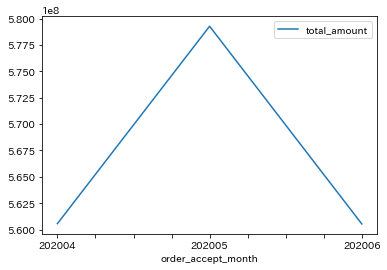

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline
month_data.sum().plot()
#monthデータをsumで合計してグラフ化した

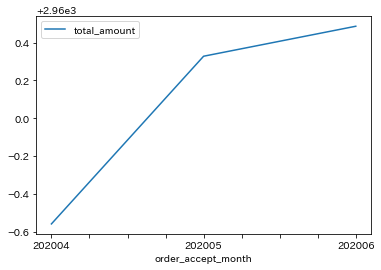

In [87]:
month_data.mean().plot()
#今度は、sumをmean平均に変更してグラフ化
#合計金額と異なる傾向が見られることが確認できた。

### ノック１５　売り上げからヒストグラムを作成

(array([ 21524.,      0.,  48969., 135664., 111217.,  77622.,  54146.,
         59814.,  34394.,  31086.]),
 array([ 698. , 1138.2, 1578.4, 2018.6, 2458.8, 2899. , 3339.2, 3779.4,
        4219.6, 4659.8, 5100. ]),
 <a list of 10 Patch objects>)

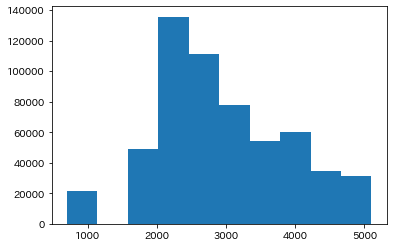

In [88]:
plt.hist(analyze_data['total_amount'])
#横軸が価格帯、縦軸がレコード数。
#「total_amount」は、注文金額。
#１オーダーあたり¥2000〜¥3000　の注文が入ることが多いことがわかった

(array([10728., 10796.,     0.,     0.,     0., 48969., 45777., 78334.,
        23175., 66451., 44368., 38745., 27653., 42503., 12508., 35285.,
        23739., 11151., 23168., 22649.,  8437.]),
 array([ 698.        ,  907.61904762, 1117.23809524, 1326.85714286,
        1536.47619048, 1746.0952381 , 1955.71428571, 2165.33333333,
        2374.95238095, 2584.57142857, 2794.19047619, 3003.80952381,
        3213.42857143, 3423.04761905, 3632.66666667, 3842.28571429,
        4051.9047619 , 4261.52380952, 4471.14285714, 4680.76190476,
        4890.38095238, 5100.        ]),
 <a list of 21 Patch objects>)

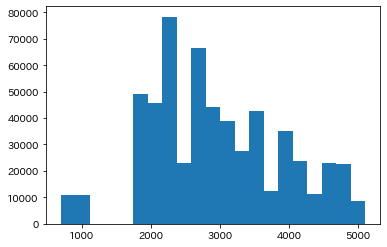

In [89]:
plt.hist(analyze_data['total_amount'],bins=21)
#細かく見たい場合は、binsで指定する

### ノック１６　都道府県の売り上げを集計して可視化

In [90]:
#　ここでは、地域別の売り上げを確認。ノック１で読み込んだ地域マスタを参照
# wide_areaは、北関東が３つにまとめられている
#narriw_areaは、都道府県
#今回は、都道府県での集計なのでnarriw_areaを使用
#  ピボットテーブルを使用してクロス集計で表示する

In [91]:
pre_data=pd.pivot_table(analyze_data, index='order_accept_month',columns='narrow_area',values='total_amount',aggfunc='mean')
pre_data
#引数１　　　　　　　　　　　　　　　　　　：集計対象データとしてanalyze_data
#引数２：index　　　　　　　　：行名「order_accept_month
#引数3:colums　　　　　 ：列名「narrow_area
#引数２volues　　　　　　　　：使用する値「total_amount'
#引数２aggfunc　　　　　 ：集計方法「mean'


narrow_area,千葉,埼玉,東京,栃木,神奈川,群馬,茨城
order_accept_month,,,,,,,
202004,2959.062000,2976.519634,2960.592173,2992.173548,2948.001171,2942.046543,2947.479814
202005,2953.545504,2977.290771,2962.603059,2998.165682,2949.597054,2948.269611,2941.796835
202006,2955.761885,2976.988380,2962.949987,2991.542844,2950.520464,2945.504744,2935.951783


In [92]:
#　順位をわかりやすくする為に可視化する

In [93]:
pip install japanize_matplotlib

You should consider upgrading via the '/Users/apple/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


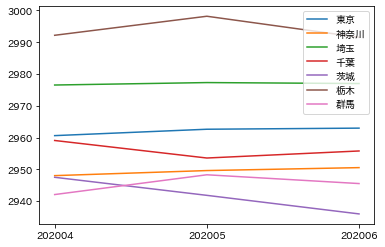

In [94]:
import japanize_matplotlib

#　import japanize_matplotlibをすると日本語表記が可能になるので覚えておく
#引数１：インデックス（）リスト
#引数2：利用するカラム
#引数3：凡例に表示する

#　地域ごとの平均売り上げの可視化

plt.plot(list(pre_data.index), pre_data['東京'], label='東京')
plt.plot(list(pre_data.index), pre_data['神奈川'], label='神奈川')
plt.plot(list(pre_data.index), pre_data['埼玉'], label='埼玉')
plt.plot(list(pre_data.index), pre_data['千葉'], label='千葉')
plt.plot(list(pre_data.index), pre_data['茨城'], label='茨城')
plt.plot(list(pre_data.index), pre_data['栃木'], label='栃木')
plt.plot(list(pre_data.index), pre_data['群馬'], label='群馬')
plt.legend()

In [95]:
### ノック１７　クラスタリングに向けてデータ加工

In [96]:
#注文データを店舗毎で集計し、クラスタリングに使用できる形にする

In [97]:
store_clustering = analyze_data.groupby('store_id').agg(['size', 'mean', 'median', 'max', 'min'])['total_amount']
#analyze_dataをgroupbyしている
#集計する値は、total_amount（合計金額）としてagg（）で平均値〜最小値を算出しstore_clusteringに格納
store_clustering.reset_index(inplace = True, drop = True)
#store_clustering.reset_index(inplace = True, drop = True)でこの後のクラスタリング結果を可視化する為
#インデックスをふり直している。インデックスを振り直す事はまれにあるので書き方を覚えておく事
#グループ化した結果が店舗数と同数である事を確認し、最後にデータの中身を確認している

print(len(store_clustering))
store_clustering.head()

196


,size,mean,median,max,min
0,2877,3129.834897,3050,5100,1857
1,2294,2989.003923,2677,5100,698
2,3776,2947.170286,2808,5100,698
3,1740,3074.770115,2877,4744,1899
4,2760,2845.661594,2791,4744,698


In [98]:
import seaborn as sns

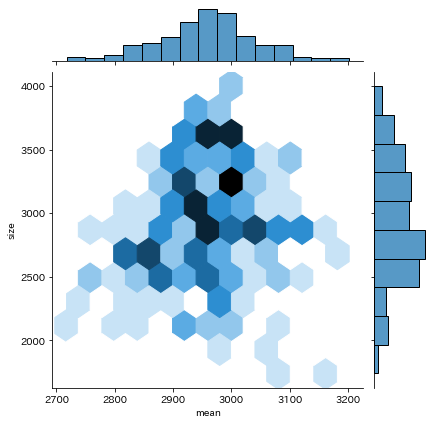

In [99]:
hexbin = sns.jointplot(x='mean',y='size',data=store_clustering,kind='hex')
#xとyに 平均値とオーダー数
#dataに store_clustering、
#グラフの種類(kind)に'hex'　

#純粋な散布図は、点の数がそのままプロットされ、点が多すぎると傾向がわかりにくくなってしまう時がある。
#六角形微ニングは、そのに含まれる点の数を色の濃さで表現できる

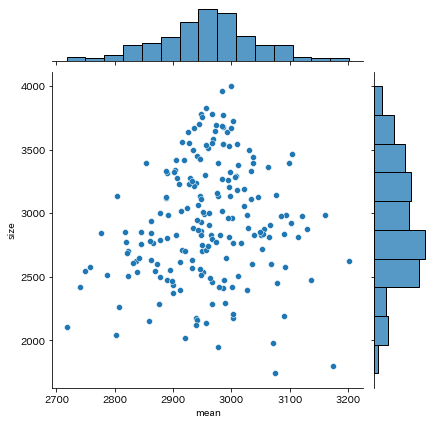

In [100]:
hexbin = sns.jointplot(x='mean',y='size',data=store_clustering)
#kind='hex'を消すと散布図が表示できる

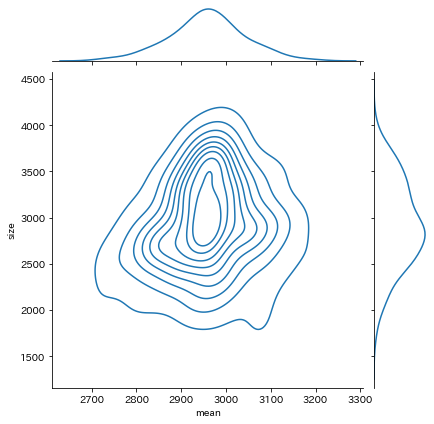

In [101]:
hexbin = sns.jointplot(x='mean',y='size',data=store_clustering,kind='kde')
#　kdeを入れると密度が表示される

### ノック１８：クラスタリングで店舗をグループ化

In [102]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
#インポート
sc = StandardScaler()
store_clustering_sc = sc.fit_transform(store_clustering)
#3〜４で標準化をしている
#　地域によってオーダー数のばらつきがあり、値のスケールが異なる可能性がる。
#機械学習に利用するデータの桁数が違う可能性がある場合、標準化してスケールを合わせる必要がある。
#標準化の説明（https://bellcurve.jp/statistics/course/7801.html）

#以下の行でクラスタ数とランダムシードを定義している（擬似乱数生成の元となる値を「random seed (乱数種)」）
kmeans = KMeans(n_clusters=4, random_state=0)
#今回はランダム数を４にしているが一概に良いとは言えないので何度も行ってみると良い
#ランダムシードをこのようにかくと固定できる。数値番号は、定義する番号なので固定を指示する数字ではない。0という番号で固定するという意味
#固定するのはm毎回結果が変わらないように固定しておくのが良い
clusters = kmeans.fit(store_clustering_sc)
#クラスタリングモデル（kmeans）を構築
store_clustering['cluster'] = clusters.labels_
#クラスタリング結果をstore_clustering['cluster'] に格納
print(store_clustering['cluster'].unique())
store_clustering.head()

#今回は、0,1,2,3のグループに分けられた

[2 0 1 3]


,size,mean,median,max,min,cluster
0,2877,3129.834897,3050,5100,1857,2
1,2294,2989.003923,2677,5100,698,0
2,3776,2947.170286,2808,5100,698,1
3,1740,3074.770115,2877,4744,1899,2
4,2760,2845.661594,2791,4744,698,0


### ノック１９：グループの傾向を分析してみよう

In [103]:
store_clustering.columns = ['月内件数', '月内平均値', '月内中央値', '月内最大値', '月内最小値', 'cluster']
store_clustering.groupby('cluster').count()
#clusterをキーとしたグループ化を行い、それぞれの件数をcount ()で取得しています。

,月内件数,月内平均値,月内中央値,月内最大値,月内最小値
cluster,,,,,
0,68,68,68,68,68
1,90,90,90,90,90
2,14,14,14,14,14
3,24,24,24,24,24


In [111]:
store_clustering.groupby('cluster').mean()
#　各店舗の平均金額を表示
#クラスタ０は、最低金額が高めなグループ、クラスタ４は売り上げが低めのグループ
#この作業でクラスタの特徴を理解していく

,月内件数,月内平均値,月内中央値,月内最大値,月内最小値
cluster,,,,,
0,2607.411765,2886.665573,2726.029412,4756.485294,744.073529
1,3274.322222,2967.131279,2797.700000,5076.266667,740.844444
2,2514.642857,3071.595911,2880.428571,4896.571429,1882.071429
3,2801.583333,3063.532847,3009.375000,5023.666667,758.250000


In [112]:
#　教師なし学習の注意点は、作られたグループがどういうグループなのか、人間が解釈して説明する必要があるという事。
#そう解釈して良いかわかりにくい時もあり、最適なクラスタ数は、状況によって違うのでいろいろ試すと良い。

### ノック２０　クラスタリングの結果をt-SNEで可視化

In [114]:
#今回データは５つの項目を持っている＝高次元のデータ。
#２次元のグラフで表現できるようにする為、次元削減を行う
#教師なし学習のライブラリが準備されている　　「s-SNE」を使う

In [119]:
from sklearn.manifold import TSNE
#ライブラリインポート
tsne = TSNE(n_components=2, random_state=0)
#t-SNEを定義
x = tsne.fit_transform(store_clustering_sc)
#「tsne.fit_transform」でモデルを構築　ノック１８の(store_clustering_sc)を引数で渡す
tsne_df = pd.DataFrame(x)
#xには、２次元データをデータフレームに格納
tsne_df['cluster'] = store_clustering['cluster']
#クラスタのIDを連結。ここで使うデータもノック１８で作成した値
tsne_df.columns = ['axis_0', 'axis_1', 'cluster']
#データフレームの項目名を再設定
tsne_df.head()
#　表示する

,axis_0,axis_1,cluster
0,0.539469,-7.694707,2
1,-1.873585,7.689422,0
2,8.455327,6.718403,1
3,-1.315627,-9.613395,2
4,-13.468518,-11.458940,0


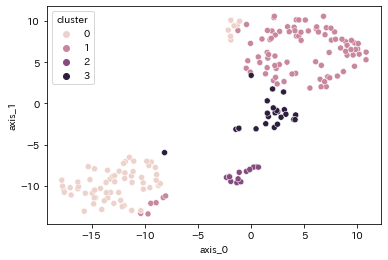

In [118]:
tsne_graph = sns.scatterplot(x='axis_0', y='axis_1', hue='cluster', data=tsne_df)